In [5]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('/home/pawel1/Pulpit/Astrophysics/CTA/cta-lstchain')
       
from lstchain.io.lsteventsource import LSTEventSource        
from lstchain.calib.r0 import LSTR0Corrections

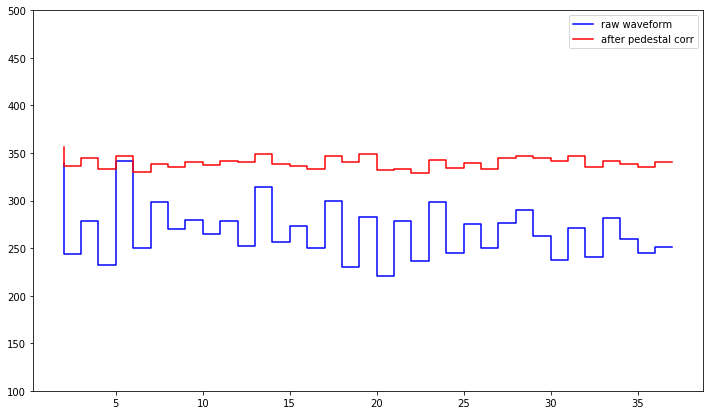

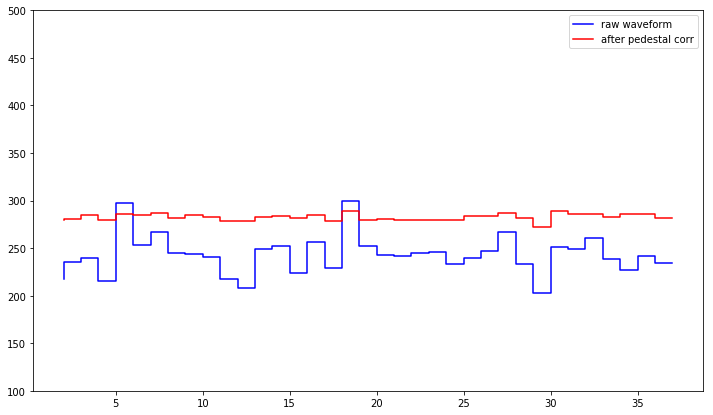

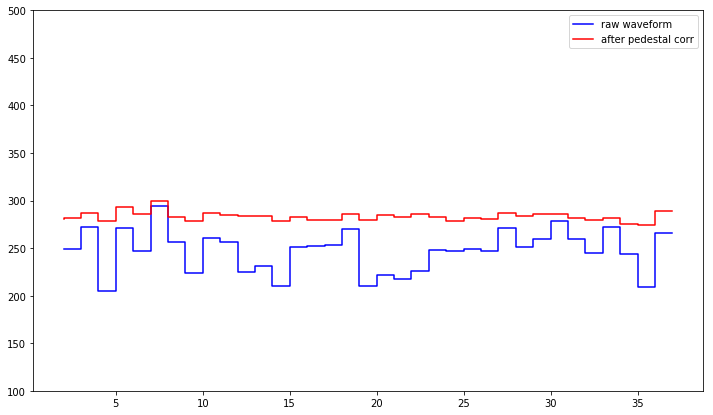

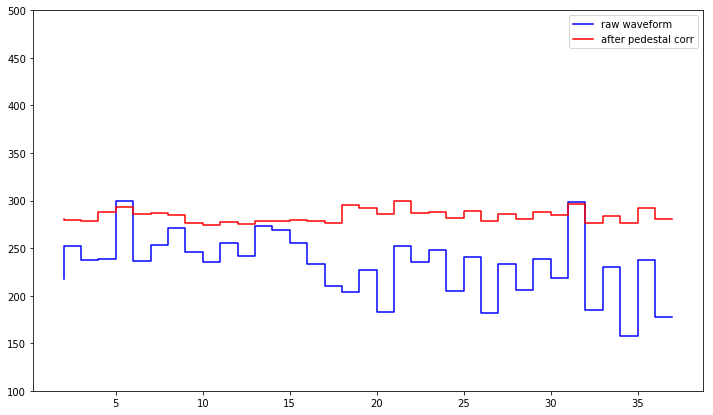

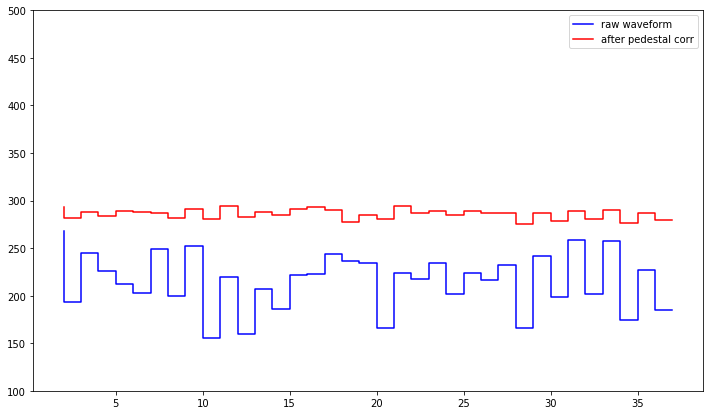

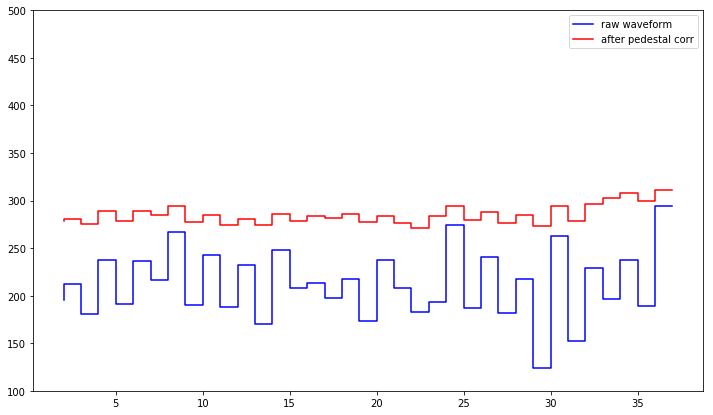

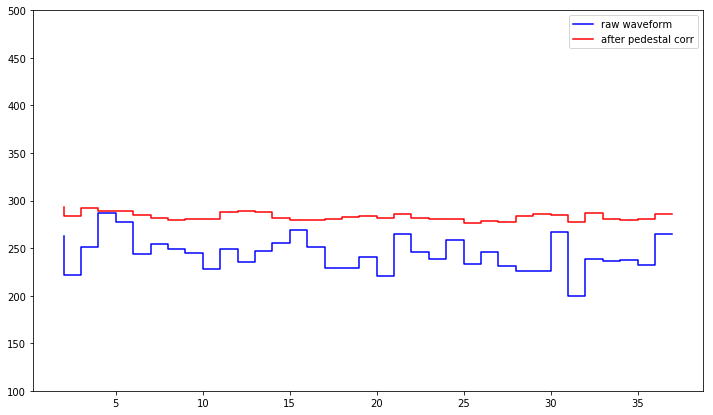

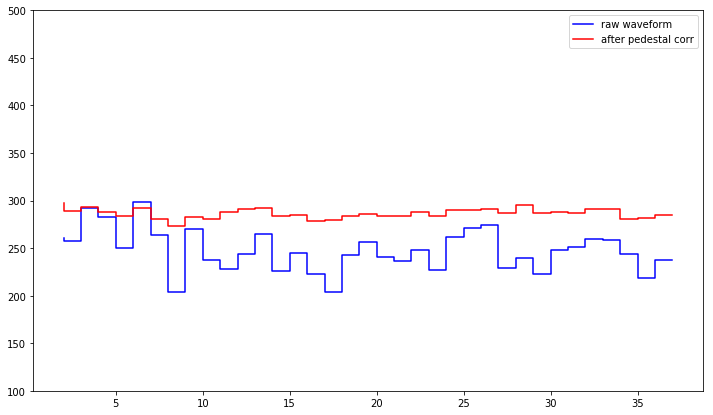

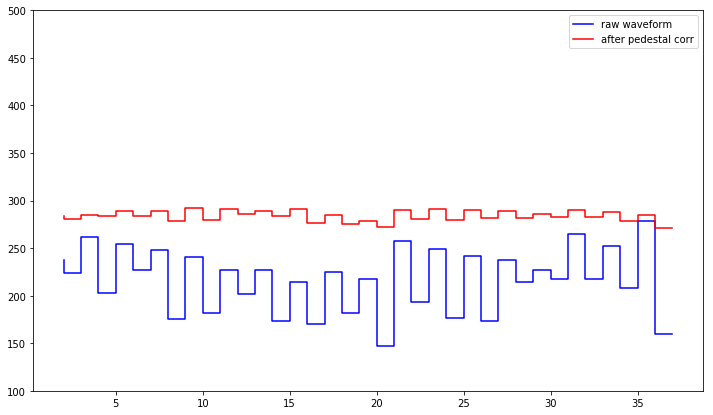

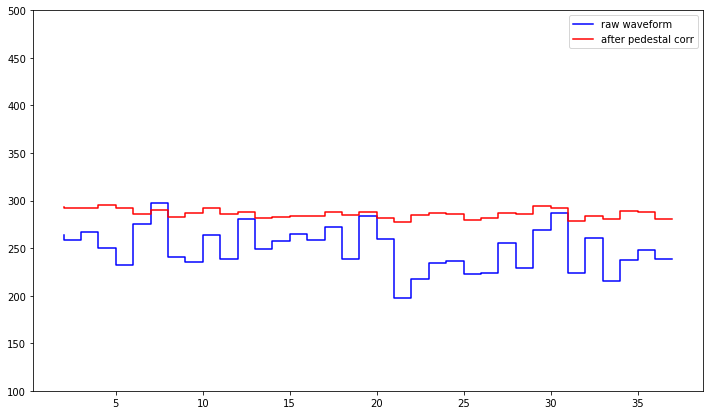

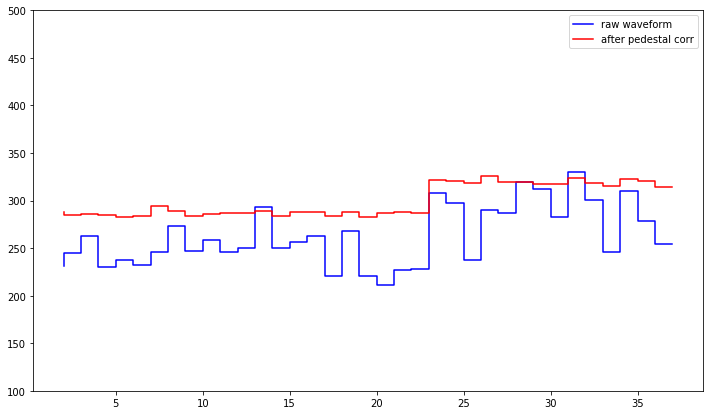

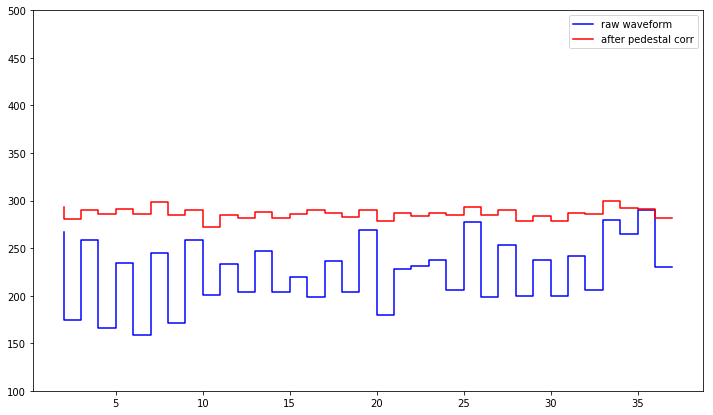

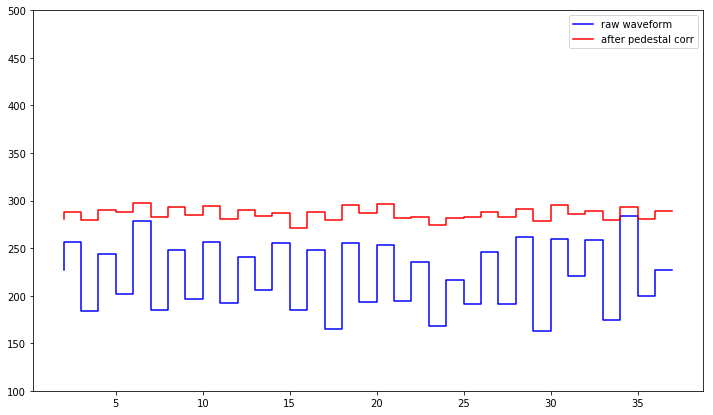

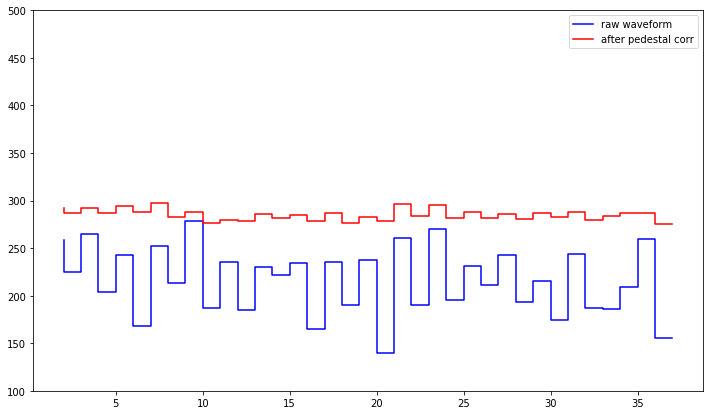

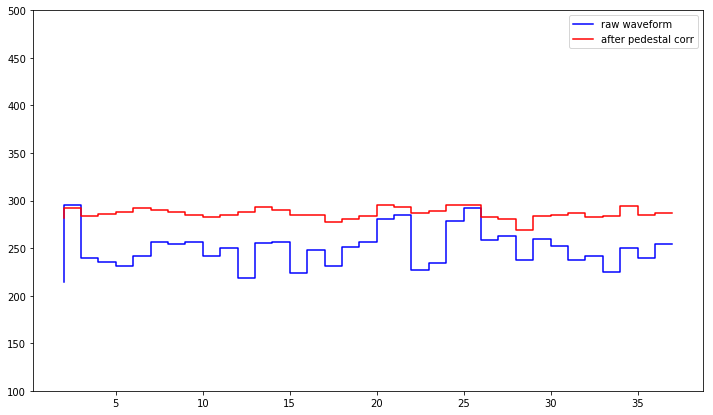

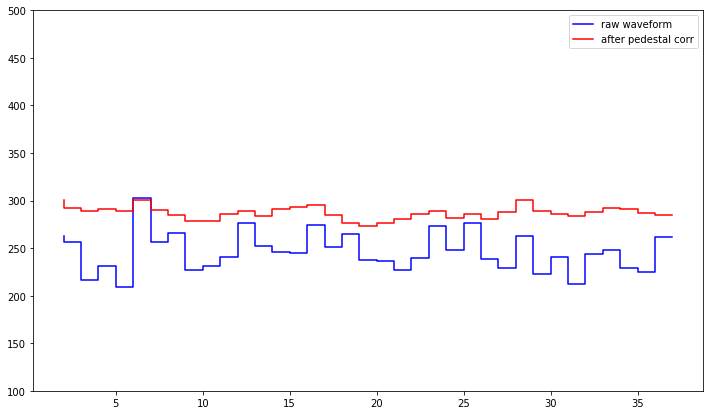

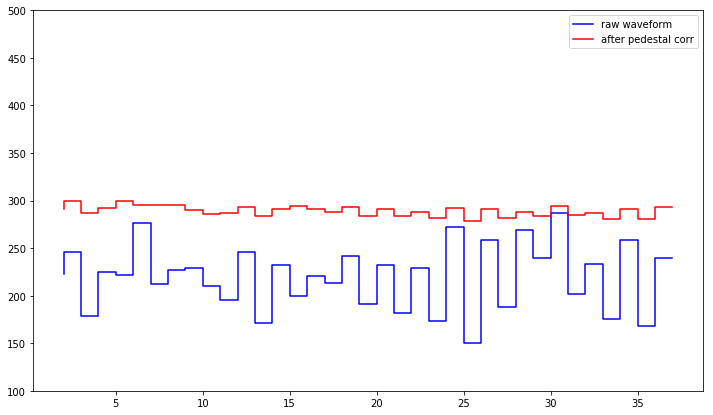

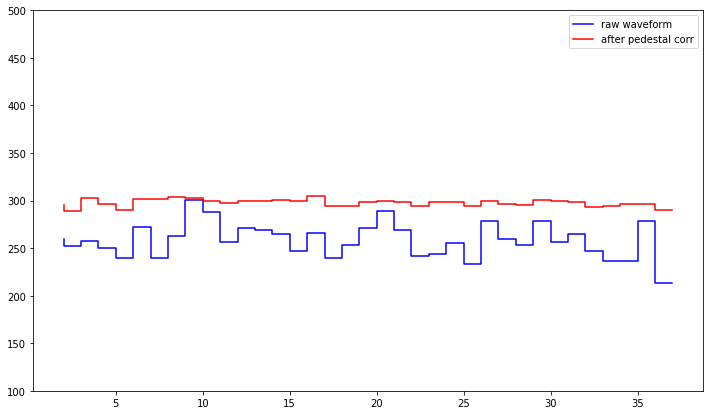

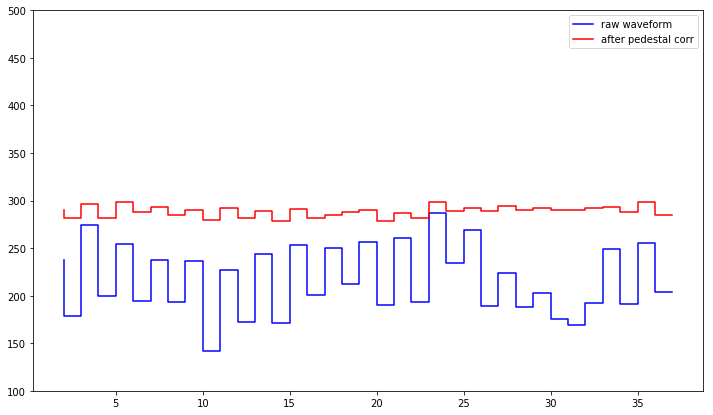

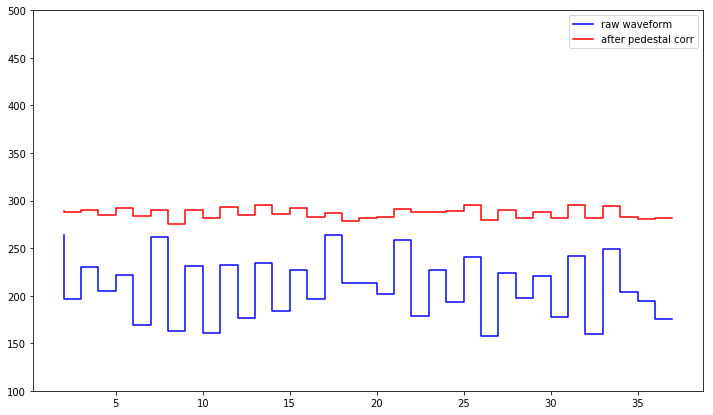

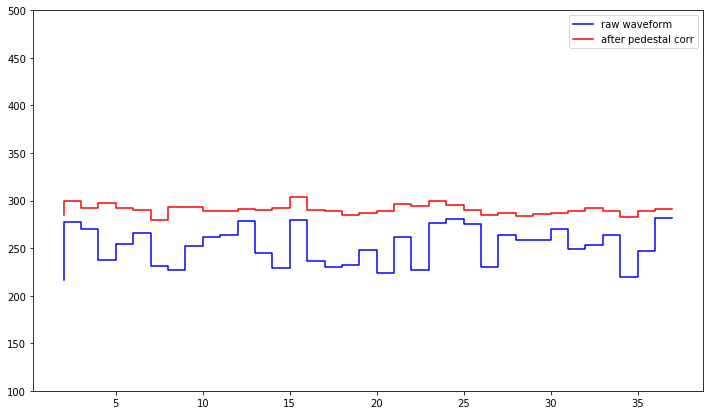

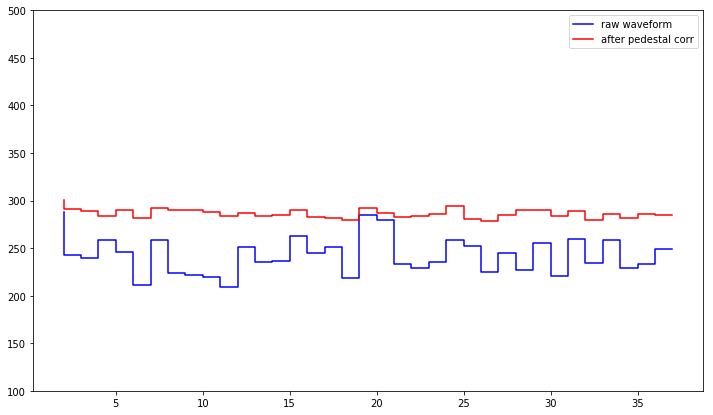

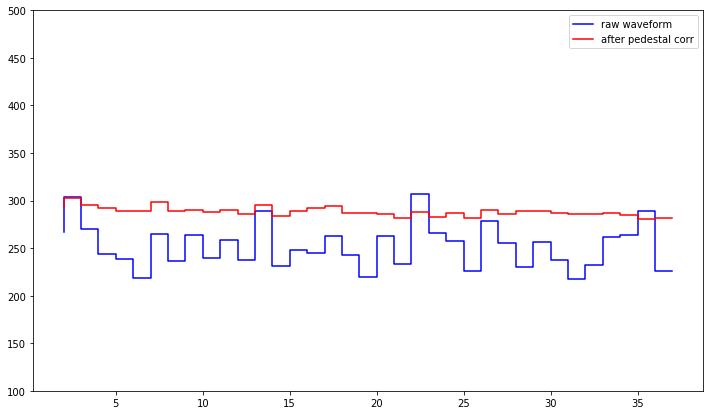

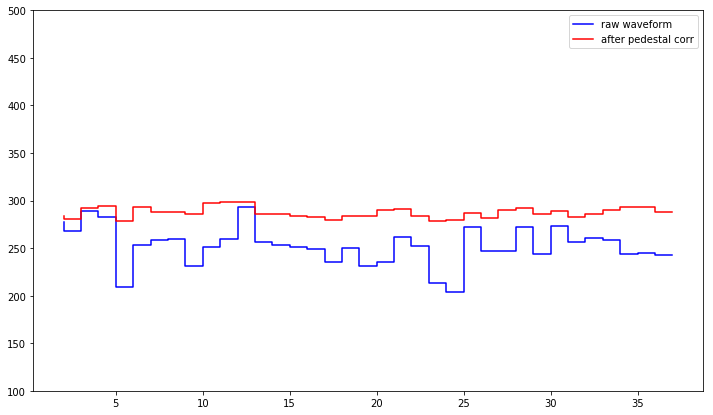

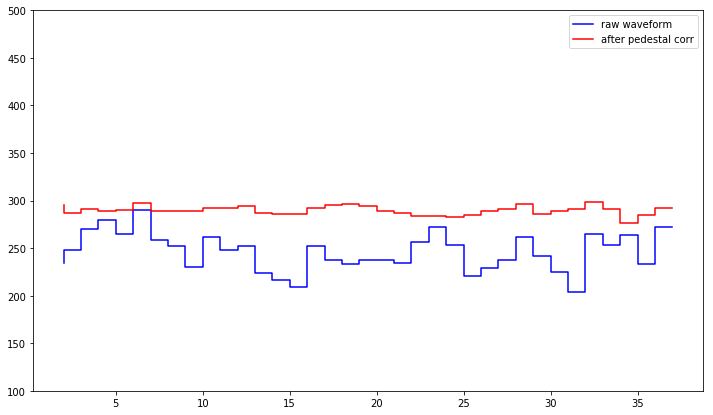

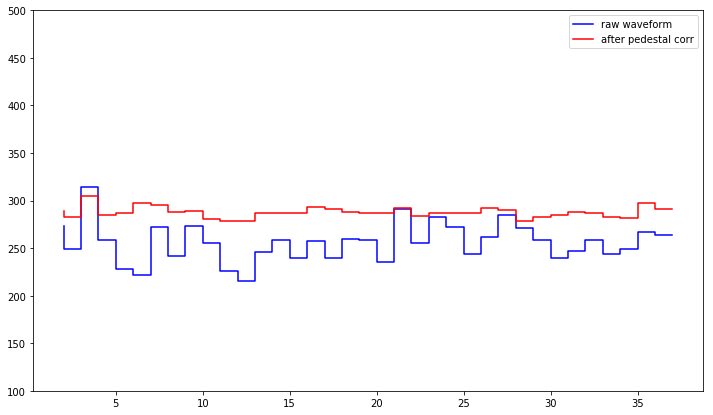

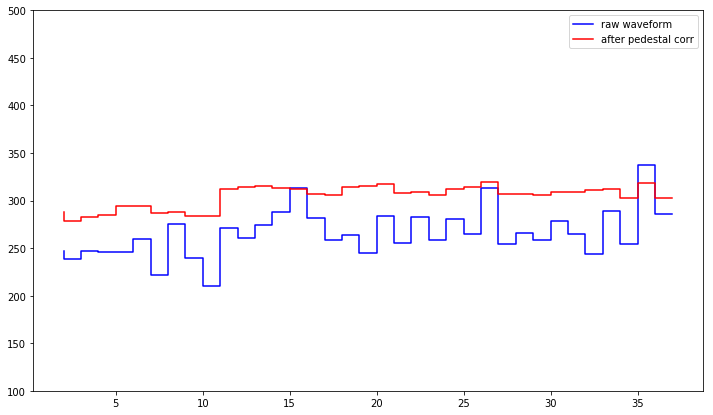

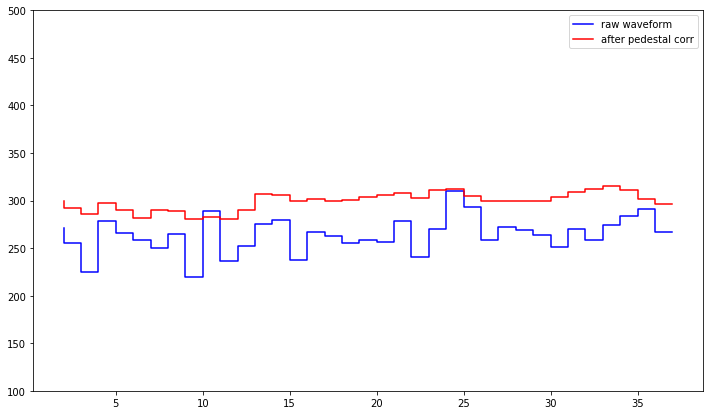

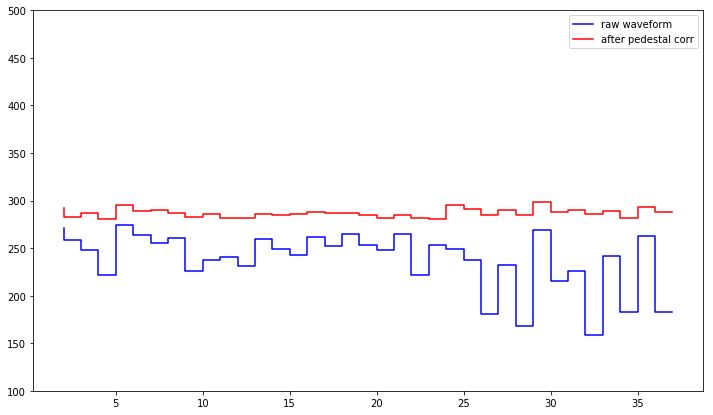

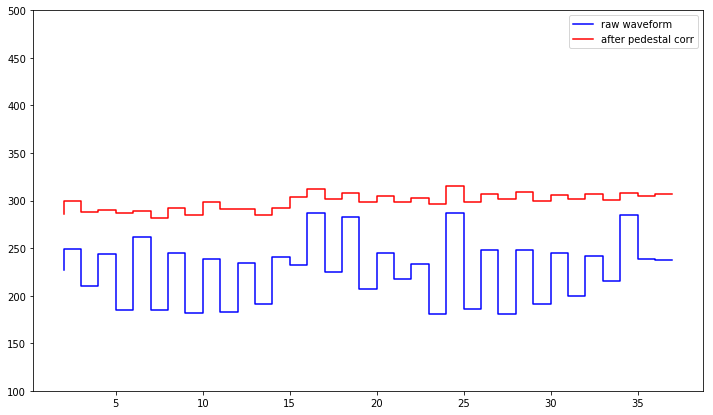

In [7]:
reader = LSTEventSource(input_url="/media/pawel1/ADATA HD330/20190215/LST-1.*.Run00097*",
                        max_events=30)

lst_r0 = LSTR0Corrections(pedestal_path=
                          "/home/pawel1/Pulpit/Astrophysics/CTA/cta-lstchain-resource/pedestal_Run0097.fits", offset=300)      
t = np.linspace(2, 37, 36)

for ev in reader:
    plt.figure(figsize=(12, 7))
    plt.step(t,  ev.r0.tel[0].waveform[1, 7, 2:38], color="blue", label="raw waveform")
    
    lst_r0.subtract_pedestal(ev)
    
    plt.step(t,  ev.r0.tel[0].waveform[1, 7, 2:38], color="red", label="after pedestal corr")
    
    plt.legend()
    plt.ylim([100, 500])
    plt.show()